In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv('players_15.csv')

def feature_classification(df):
    ordinal = ['Age', 'Overall', 'Potential', 'International Reputation', 'Weak Foot', 'Skill Moves']
    nominal = ['Short Name', 'Long Name', 'Nationality', 'Club', 'Preferred Foot']
    interval = ['Height (cm)', 'Weight (kg)', 'Value (EUR)', 'Wage (EUR)']
    ratio = []
    print("Ordinal Features: ", ordinal)
    print("Nominal Features: ", nominal)
    print("Interval Features: ", interval)
    print("Ratio Features: ", ratio)

def data_quality_issues(df):
    missing_values = df.isnull().sum()
    print("\nMissing Values:\n", missing_values)
    
    duplicates = df.duplicated().sum()
    print("\nDuplicates: ", duplicates)

    print("\nData Types:\n", df.dtypes)

def summary_statistics(df):
    summary = df.describe().transpose()
    print("\nSummary Statistics:\n", summary)

    categorical_summary = df.select_dtypes(include=['object']).describe()
    print("\nCategorical Summary:\n", categorical_summary)

def visualizations(df):
    plt.figure(figsize=(12, 6))
    sns.histplot(df['Age'], kde=True)
    plt.title('Age Distribution')
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df['Age'])
    plt.title('Age Box Plot')
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.histplot(df['Overall'], kde=True)
    plt.title('Overall Rating Distribution')
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df['Overall'])
    plt.title('Overall Rating Box Plot')
    plt.show()

def outlier_handling(df):
    Q1_age = df['Age'].quantile(0.25)
    Q3_age = df['Age'].quantile(0.75)
    IQR_age = Q3_age - Q1_age
    lower_bound_age = Q1_age - 1.5 * IQR_age
    upper_bound_age = Q3_age + 1.5 * IQR_age
    age_outliers = df[(df['Age'] < lower_bound_age) | (df['Age'] > upper_bound_age)]

    Q1_overall = df['Overall'].quantile(0.25)
    Q3_overall = df['Overall'].quantile(0.75)
    IQR_overall = Q3_overall - Q1_overall
    lower_bound_overall = Q1_overall - 1.5 * IQR_overall
    upper_bound_overall = Q3_overall + 1.5 * IQR_overall
    overall_outliers = df[(df['Overall'] < lower_bound_overall) | (df['Overall'] > upper_bound_overall)]

    print("\nAge Outliers:\n", age_outliers)
    print("\nOverall Outliers:\n", overall_outliers)

    df_cleaned = df[(df['Age'] >= lower_bound_age) & (df['Age'] <= upper_bound_age)]
    df_cleaned = df_cleaned[(df_cleaned['Overall'] >= lower_bound_overall) & (df_cleaned['Overall'] <= upper_bound_overall)]
    
    return df_cleaned

def qq_plot(df):
    stats.probplot(df['Overall'], dist="norm", plot=plt)
    plt.title('Q-Q Plot for Overall Rating')
    plt.show()

def correlation_analysis(df):
    correlation = df[['Age', 'Overall', 'Potential', 'Height (cm)', 'Weight (kg)', 'Value (EUR)', 'Wage (EUR)']].corr()
    print("\nCorrelation Matrix:\n", correlation)

    strongest_correlation = correlation['Overall'].abs().idxmax()
    print("\nStrongest Correlation with Overall: ", strongest_correlation)

def pair_plot_analysis(df):
    sample_df = df.sample(n=10000, random_state=42)
    sns.pairplot(sample_df[['Age', 'Overall', 'Potential']], hue='Potential')
    plt.show()

feature_classification(df)
data_quality_issues(df)
summary_statistics(df)
visualizations(df)
df_cleaned = outlier_handling(df)
qq_plot(df_cleaned)
correlation_analysis(df_cleaned)
pair_plot_analysis(df)


Ordinal Features:  ['Age', 'Overall', 'Potential', 'International Reputation', 'Weak Foot', 'Skill Moves']
Nominal Features:  ['Short Name', 'Long Name', 'Nationality', 'Club', 'Preferred Foot']
Interval Features:  ['Height (cm)', 'Weight (kg)', 'Value (EUR)', 'Wage (EUR)']
Ratio Features:  []

Missing Values:
 sofifa_id                   0
short_name                  0
long_name                   0
age                         0
dob                         0
height_cm                   0
weight_kg                   0
nationality                 0
club                        0
overall                     0
potential                   0
value_eur                   0
wage_eur                    0
preferred_foot              0
international_reputation    0
weak_foot                   0
skill_moves                 0
dtype: int64

Duplicates:  0

Data Types:
 sofifa_id                    int64
short_name                  object
long_name                   object
age                          

KeyError: 'Age'

<Figure size 1200x600 with 0 Axes>

Columns in the dataset: Index(['sofifa_id', 'short_name', 'long_name', 'age', 'dob', 'height_cm',
       'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur',
       'wage_eur', 'preferred_foot', 'international_reputation', 'weak_foot',
       'skill_moves'],
      dtype='object')
Ordinal Features:  ['Age', 'Overall', 'Potential', 'International Reputation', 'Weak Foot', 'Skill Moves']
Nominal Features:  ['Short Name', 'Long Name', 'Nationality', 'Club', 'Preferred Foot']
Interval Features:  ['Height (cm)', 'Weight (kg)', 'Value (EUR)', 'Wage (EUR)']
Ratio Features:  []

Missing Values:
 sofifa_id                   0
short_name                  0
long_name                   0
age                         0
dob                         0
height_cm                   0
weight_kg                   0
nationality                 0
club                        0
overall                     0
potential                   0
value_eur                   0
wage_eur                  

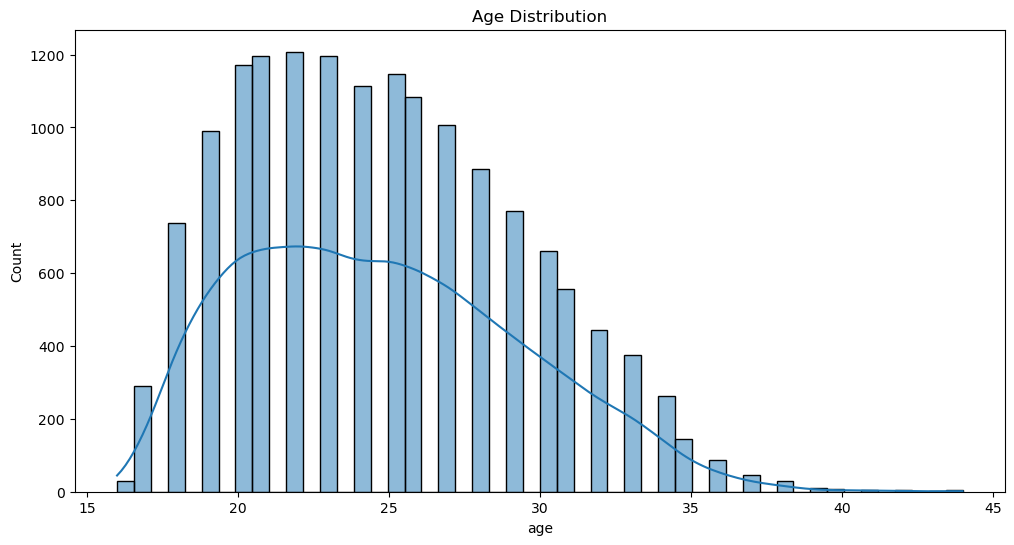

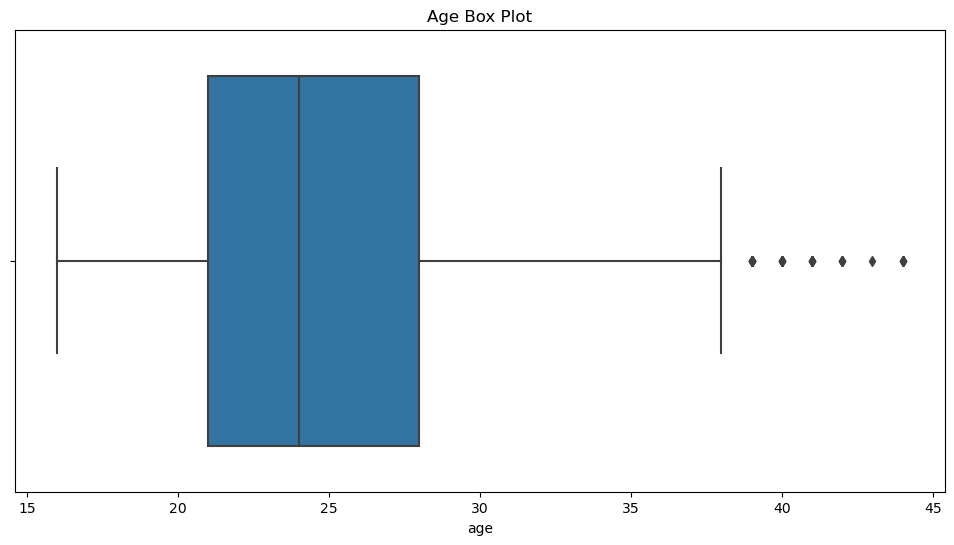

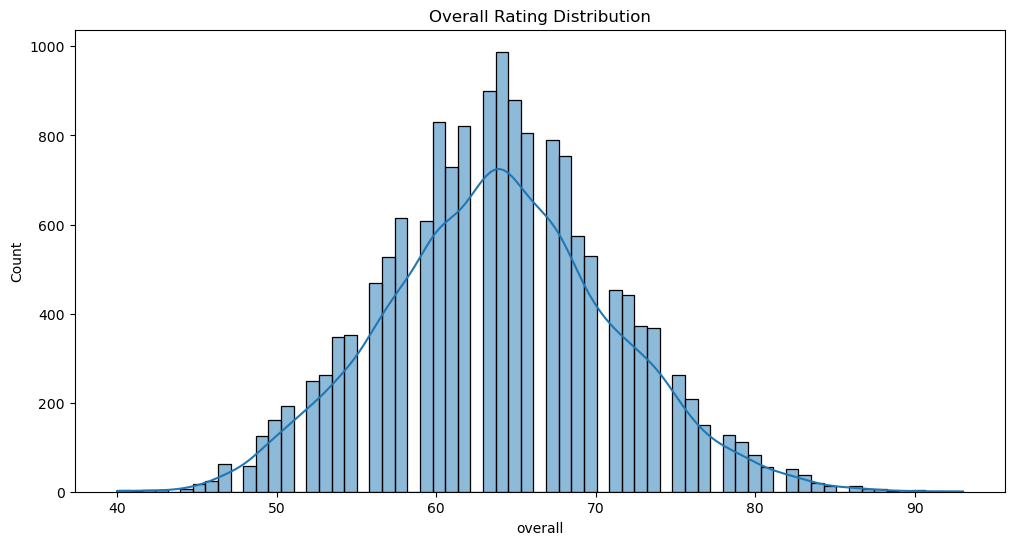

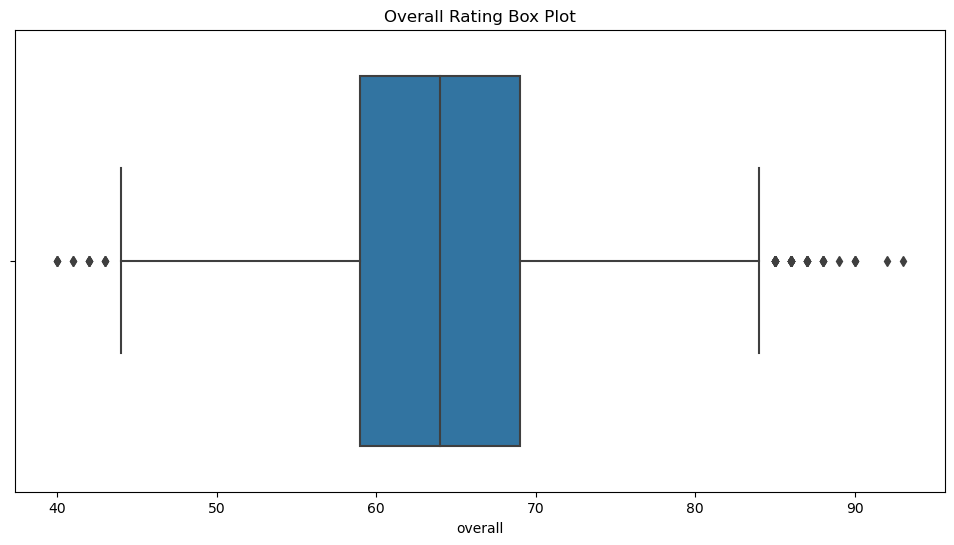


Age Outliers:
        sofifa_id       short_name                      long_name  age  \
468        11983       B. Friedel                   Brad Friedel   43   
792          684     M. Schwarzer                 Mark Schwarzer   41   
1719        7939  J. Jääskeläinen             Jussi Jääskeläinen   39   
1722       19896          Valerón    Juan Carlos Valerón Santana   39   
2636      135708        C. Blanco        Cuauhtémoc Blanco Bravo   41   
2645      139006       O. Sánchez  Oswaldo Javier Sánchez Ibarra   40   
3102        4985         J. Leroy                   Jérôme Leroy   39   
3172      148194   R. Berezovskiy              Roman Berezovskiy   39   
3270      188033     E. El-Hadary   Essam Kamal Tawfik El Hadary   41   
3676      136594     Kim Byung Ji               김병지 Byung Ji Kim   44   
3692      140029         O. Pérez              Óscar Pérez Rojas   41   
3756      161260     A. Filimonov            Aleksandr Filimonov   40   
4354       50763        S. Harper  

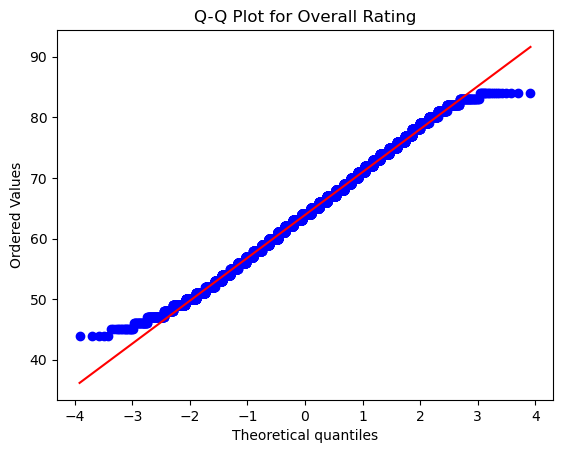


Correlation Matrix:
                 age   overall  potential  height_cm  weight_kg  value_eur  \
age        1.000000  0.443726  -0.074584   0.082778   0.208519        NaN   
overall    0.443726  1.000000   0.798945   0.050376   0.123851        NaN   
potential -0.074584  0.798945   1.000000   0.014410   0.014621        NaN   
height_cm  0.082778  0.050376   0.014410   1.000000   0.765971        NaN   
weight_kg  0.208519  0.123851   0.014621   0.765971   1.000000        NaN   
value_eur       NaN       NaN        NaN        NaN        NaN        NaN   
wage_eur        NaN       NaN        NaN        NaN        NaN        NaN   

           wage_eur  
age             NaN  
overall         NaN  
potential       NaN  
height_cm       NaN  
weight_kg       NaN  
value_eur       NaN  
wage_eur        NaN  

Strongest Correlation with Overall:  overall


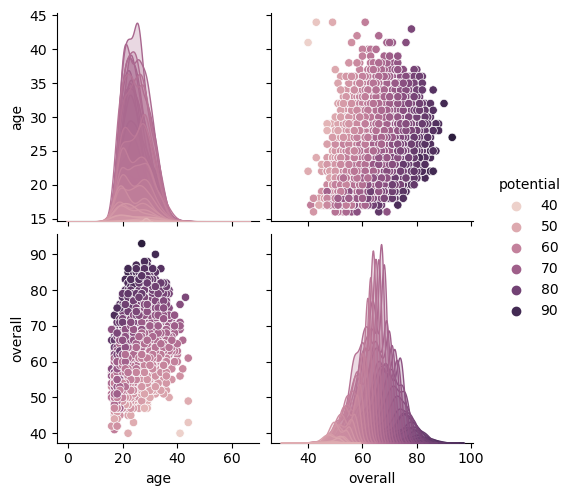

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv('players_15.csv')

# Inspect column names
print("Columns in the dataset:", df.columns)

# Strip any leading/trailing spaces in column names
df.columns = df.columns.str.strip()

def feature_classification(df):
    ordinal = ['Age', 'Overall', 'Potential', 'International Reputation', 'Weak Foot', 'Skill Moves']
    nominal = ['Short Name', 'Long Name', 'Nationality', 'Club', 'Preferred Foot']
    interval = ['Height (cm)', 'Weight (kg)', 'Value (EUR)', 'Wage (EUR)']
    ratio = []
    print("Ordinal Features: ", ordinal)
    print("Nominal Features: ", nominal)
    print("Interval Features: ", interval)
    print("Ratio Features: ", ratio)

def data_quality_issues(df):
    missing_values = df.isnull().sum()
    print("\nMissing Values:\n", missing_values)
    
    duplicates = df.duplicated().sum()
    print("\nDuplicates: ", duplicates)

    print("\nData Types:\n", df.dtypes)

def summary_statistics(df):
    summary = df.describe().transpose()
    print("\nSummary Statistics:\n", summary)

    categorical_summary = df.select_dtypes(include=['object']).describe()
    print("\nCategorical Summary:\n", categorical_summary)

def visualizations(df):
    plt.figure(figsize=(12, 6))
    sns.histplot(df['age'], kde=True)
    plt.title('Age Distribution')
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df['age'])
    plt.title('Age Box Plot')
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.histplot(df['overall'], kde=True)
    plt.title('Overall Rating Distribution')
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df['overall'])
    plt.title('Overall Rating Box Plot')
    plt.show()

def outlier_handling(df):
    Q1_age = df['age'].quantile(0.25)
    Q3_age = df['age'].quantile(0.75)
    IQR_age = Q3_age - Q1_age
    lower_bound_age = Q1_age - 1.5 * IQR_age
    upper_bound_age = Q3_age + 1.5 * IQR_age
    age_outliers = df[(df['age'] < lower_bound_age) | (df['age'] > upper_bound_age)]

    Q1_overall = df['overall'].quantile(0.25)
    Q3_overall = df['overall'].quantile(0.75)
    IQR_overall = Q3_overall - Q1_overall
    lower_bound_overall = Q1_overall - 1.5 * IQR_overall
    upper_bound_overall = Q3_overall + 1.5 * IQR_overall
    overall_outliers = df[(df['overall'] < lower_bound_overall) | (df['overall'] > upper_bound_overall)]

    print("\nAge Outliers:\n", age_outliers)
    print("\nOverall Outliers:\n", overall_outliers)

    df_cleaned = df[(df['age'] >= lower_bound_age) & (df['age'] <= upper_bound_age)]
    df_cleaned = df_cleaned[(df_cleaned['overall'] >= lower_bound_overall) & (df_cleaned['overall'] <= upper_bound_overall)]
    
    return df_cleaned

def qq_plot(df):
    stats.probplot(df['overall'], dist="norm", plot=plt)
    plt.title('Q-Q Plot for Overall Rating')
    plt.show()

def correlation_analysis(df):
    correlation = df[['age', 'overall', 'potential', 'height_cm', 'weight_kg', 'value_eur', 'wage_eur']].corr()
    print("\nCorrelation Matrix:\n", correlation)

    strongest_correlation = correlation['overall'].abs().idxmax()
    print("\nStrongest Correlation with Overall: ", strongest_correlation)

def pair_plot_analysis(df):
    sample_df = df.sample(n=10000, random_state=42)
    sns.pairplot(sample_df[['age', 'overall', 'potential']], hue='potential')
    plt.show()

feature_classification(df)
data_quality_issues(df)
summary_statistics(df)
visualizations(df)
df_cleaned = outlier_handling(df)
qq_plot(df_cleaned)
correlation_analysis(df_cleaned)
pair_plot_analysis(df)


In [8]:
import pandas as pd
import numpy as np
from scipy import stats

# Load the dataset
df = pd.read_csv('players_15.csv')

# Strip any leading/trailing spaces in column names
df.columns = df.columns.str.strip()

# 9. Hypothesis Testing (Mann-Whitney U Test)
def hypothesis_testing(df):
    # Divide players into two groups based on age: <30 and >=30
    group_1 = df[df['age'] < 30]['overall']
    group_2 = df[df['age'] >= 30]['overall']
    
    # Null Hypothesis (H₀): Median Overall scores between the two groups are the same.
    # Alternative Hypothesis (H₁): Median Overall scores between the two groups are different.
    
    # Perform Mann-Whitney U Test
    u_stat, p_value = stats.mannwhitneyu(group_1, group_2, alternative='two-sided')
    
    print("\nMann-Whitney U Test Results:")
    print(f"U-statistic: {u_stat}")
    print(f"P-value: {p_value}")
    
    # Interpret the results
    if p_value < 0.05:
        print("Reject the null hypothesis: There is a significant difference in median Overall scores.")
    else:
        print("Fail to reject the null hypothesis: There is no significant difference in median Overall scores.")

# 10. Margin of Error Calculation
def margin_of_error(df):
    # Divide players into two groups based on age: <30 and >=30
    group_1 = df[df['age'] < 30]['overall']
    group_2 = df[df['age'] >= 30]['overall']
    
    # Calculate the standard deviation and sample size for each group
    std_dev_1 = np.std(group_1, ddof=1)  # Sample standard deviation (ddof=1)
    std_dev_2 = np.std(group_2, ddof=1)
    
    n_1 = len(group_1)
    n_2 = len(group_2)
    
    # Calculate standard error for each group
    se_1 = std_dev_1 / np.sqrt(n_1)
    se_2 = std_dev_2 / np.sqrt(n_2)
    
    # 95% confidence level Z-score = 1.96
    z_score = 1.96
    
    # Calculate margin of error for each group
    moe_1 = z_score * se_1
    moe_2 = z_score * se_2
    
    print("\nMargin of Error for Each Group:")
    print(f"Margin of Error for Group 1 (<30 years): {moe_1}")
    print(f"Margin of Error for Group 2 (>=30 years): {moe_2}")
    
    # Conclusion based on margin of error
    print("\nMargin of Error Interpretation:")
    print("The margin of error represents the range within which we expect the true population median to lie, given the sample data.")

# Run the tests
hypothesis_testing(df)
margin_of_error(df)



Mann-Whitney U Test Results:
U-statistic: 11455743.5
P-value: 4.0233441806998076e-151
Reject the null hypothesis: There is a significant difference in median Overall scores.

Margin of Error for Each Group:
Margin of Error for Group 1 (<30 years): 0.1255334963477923
Margin of Error for Group 2 (>=30 years): 0.23034804034691606

Margin of Error Interpretation:
The margin of error represents the range within which we expect the true population median to lie, given the sample data.



Linear Regression Results:
Mean Squared Error (MSE): 5.386193769711528
Root Mean Squared Error (RMSE): 2.3208174787586224


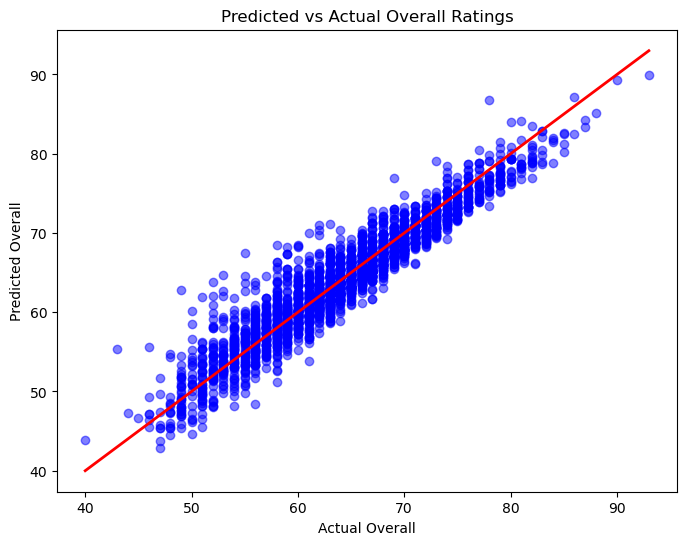


Feature Engineering Results:
   age  potential  overall  Age_to_Potential_Ratio  Experience_Factor
0   27         95       93                0.284211                  2
1   29         92       92                0.315217                  0
2   30         90       90                0.333333                  0
3   32         90       90                0.355556                  0
4   28         90       90                0.311111                  0


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load the dataset
df = pd.read_csv('players_15.csv')

# Strip any leading/trailing spaces in column names
df.columns = df.columns.str.strip()

# 11. Linear Regression Analysis
def linear_regression_analysis(df):
    # Prepare the features and target variable
    X = df[['age', 'potential']]  # Independent variables
    y = df['overall']  # Dependent variable

    # Split the data into training and test sets (80-20 split)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and fit the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Compute MSE and RMSE
    mse = mean_squared_error(y_test, y_pred)
    rmse = sqrt(mse)

    print("\nLinear Regression Results:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")

    # Plot predicted values vs actual values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
    plt.title('Predicted vs Actual Overall Ratings')
    plt.xlabel('Actual Overall')
    plt.ylabel('Predicted Overall')
    plt.show()

# 12. Feature Engineering
def feature_engineering(df):
    # 1. Age-to-Potential Ratio: This could represent how early in their career a player is compared to their potential.
    df['Age_to_Potential_Ratio'] = df['age'] / df['potential']
    
    # 2. Experience Factor: Difference between Potential and Overall score.
    df['Experience_Factor'] = df['potential'] - df['overall']

    # Check the new features
    print("\nFeature Engineering Results:")
    print(df[['age', 'potential', 'overall', 'Age_to_Potential_Ratio', 'Experience_Factor']].head())

# Run the tasks
linear_regression_analysis(df)
feature_engineering(df)
